In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/AI/AI- customer churn/telecom_churn.csv')

In [ ]:
df.shape

(3333, 11)

Churn
0    2850
1     483
Name: count, dtype: int64


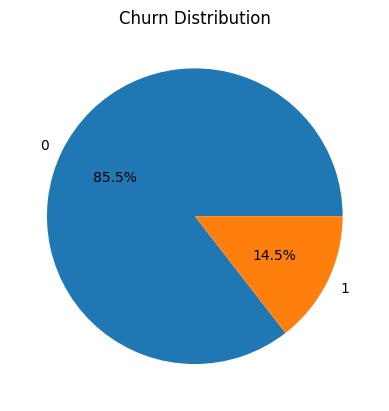

In [ ]:
churn_counts = df['Churn'].value_counts()
print(churn_counts)

# You can also visualize this using pie charts or bar charts
import matplotlib.pyplot as plt

plt.pie(churn_counts.values, labels=churn_counts.index, autopct="%1.1f%%")
plt.title("Churn Distribution")
plt.show()

In [ ]:
df.isnull().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

#Preprocessing

##Sampling

In [ ]:
from imblearn.over_sampling import SMOTE

X = df.drop(columns=['Churn'])
y = df['Churn']

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

df_upsampled = pd.DataFrame(X_resampled, columns=X.columns)
df_upsampled['Churn'] = y_resampled

print("Before upsampling:")
print(y.value_counts())
print("\nAfter upsampling:")
print(y_resampled.value_counts())

Before upsampling:
Churn
0    2850
1     483
Name: count, dtype: int64

After upsampling:
Churn
0    2850
1    2850
Name: count, dtype: int64


In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
X_resampled, y_resampled = rus.fit_resample(X, y)

df_downsampled = pd.DataFrame(X_resampled, columns=X.columns)
df_downsampled['Churn'] = y_resampled

print("Before downsampling:")
print(y.value_counts())
print("\nAfter downsampling:")
print(y_resampled.value_counts())

Before downsampling:
Churn
0    2850
1     483
Name: count, dtype: int64

After downsampling:
Churn
0    483
1    483
Name: count, dtype: int64


##Feature Scaling

In [ ]:
#feature scaling for ori dataset
from sklearn.preprocessing import MinMaxScaler, StandardScaler

df_standardized = df.copy()

# Initialize the scalers
standard_scaler = StandardScaler()


# Perform Standardization on tenure, MonthlyCharges, and TotalCharges for the standardized dataframe
df_standardized[['AccountWeeks', 'DataUsage', 'CustServCalls','DayMins','DayCalls','MonthlyCharge', 'OverageFee', 'RoamMins']] = standard_scaler.fit_transform(
df_standardized[['AccountWeeks', 'DataUsage', 'CustServCalls','DayMins','DayCalls','MonthlyCharge', 'OverageFee', 'RoamMins']])

min_val_standardized = df_standardized.min()

df_standardized[['AccountWeeks', 'DataUsage', 'CustServCalls','DayMins','DayCalls','MonthlyCharge', 'OverageFee', 'RoamMins']] += abs(min_val_standardized[['AccountWeeks', 'DataUsage', 'CustServCalls','DayMins','DayCalls','MonthlyCharge', 'OverageFee', 'RoamMins']])


# Print the first few rows of the standardized dataframe
print("\nStandardized DataFrame:")
print(df_standardized.head())


Standardized DataFrame:
   Churn  AccountWeeks  ContractRenewal  DataPlan  DataUsage  CustServCalls  \
0      0      3.189662                1         1   2.121846       0.760286   
1      0      2.662238                1         1   2.907714       0.760286   
2      0      3.415701                1         0   0.000000       0.000000   
3      0      2.084582                0         0   0.000000       1.520573   
4      0      1.858543                0         0   0.000000       2.280859   

    DayMins  DayCalls  MonthlyCharge  OverageFee  RoamMins  
0  4.867863  5.481890       4.566608    3.892982  3.582405  
1  2.967358  6.129749       4.140392    3.857484  4.907895  
2  4.469399  5.681231       2.313748    2.390220  4.370534  
3  5.497692  3.538311       2.618189    1.222720  2.364387  
4  3.061006  5.631396       1.643979    2.926639  3.618229  


In [ ]:
#feature scaling for upsampling dataset
from sklearn.preprocessing import MinMaxScaler, StandardScaler

df_us_standardized = df_upsampled.copy()

# Initialize the scalers
standard_scaler = StandardScaler()


# Perform Standardization on tenure, MonthlyCharges, and TotalCharges for the standardized dataframe
df_us_standardized[['AccountWeeks', 'DataUsage', 'CustServCalls','DayMins','DayCalls','MonthlyCharge', 'OverageFee', 'RoamMins']] = standard_scaler.fit_transform(
df_us_standardized[['AccountWeeks', 'DataUsage', 'CustServCalls','DayMins','DayCalls','MonthlyCharge', 'OverageFee', 'RoamMins']])

min_val_standardized = df_us_standardized.min()

df_us_standardized[['AccountWeeks', 'DataUsage', 'CustServCalls','DayMins','DayCalls','MonthlyCharge', 'OverageFee', 'RoamMins']] += abs(min_val_standardized[['AccountWeeks', 'DataUsage', 'CustServCalls','DayMins','DayCalls','MonthlyCharge', 'OverageFee', 'RoamMins']])


# Print the first few rows of the standardized dataframe
print("\nStandardized DataFrame:")
print(df_us_standardized.head())


Standardized DataFrame:
   AccountWeeks  ContractRenewal  DataPlan  DataUsage  CustServCalls  \
0      3.267241                1         1   2.261848       0.696855   
1      2.726989                1         1   3.099569       0.696855   
2      3.498778                1         0   0.000000       0.000000   
3      2.135284                0         0   0.000000       1.393710   
4      1.903747                0         0   0.000000       2.090565   

    DayMins  DayCalls  MonthlyCharge  OverageFee  RoamMins  Churn  
0  4.264190  5.544813       4.679413    4.063848  3.869635      0  
1  2.599371  6.200109       4.242668    4.026792  5.301400      0  
2  3.915141  5.746442       2.370903    2.495129  4.720955      0  
3  4.815913  3.578925       2.682864    1.276386  2.553959      0  
4  2.681405  5.696035       1.684589    3.055092  3.908331      0  


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

df_ds_standardized = df_downsampled.copy()

# Initialize the scalers
standard_scaler = StandardScaler()


# Perform Standardization on tenure, MonthlyCharges, and TotalCharges for the standardized dataframe
df_ds_standardized[['AccountWeeks', 'DataUsage', 'CustServCalls','DayMins','DayCalls','MonthlyCharge', 'OverageFee', 'RoamMins']] = standard_scaler.fit_transform(
df_ds_standardized[['AccountWeeks', 'DataUsage', 'CustServCalls','DayMins','DayCalls','MonthlyCharge', 'OverageFee', 'RoamMins']])

min_val_standardized = df_ds_standardized.min()

df_ds_standardized[['AccountWeeks', 'DataUsage', 'CustServCalls','DayMins','DayCalls','MonthlyCharge', 'OverageFee', 'RoamMins']] += abs(min_val_standardized[['AccountWeeks', 'DataUsage', 'CustServCalls','DayMins','DayCalls','MonthlyCharge', 'OverageFee', 'RoamMins']])


# Print the first few rows of the standardized dataframe
print("\nStandardized DataFrame:")
print(df_ds_standardized.head())


Standardized DataFrame:
   AccountWeeks  ContractRenewal  DataPlan  DataUsage  CustServCalls  \
0      1.006440                0         0   0.182076       0.000000   
1      1.341920                1         0   0.000000       0.617411   
2      1.264502                0         1   1.709931       0.000000   
3      3.870924                1         0   0.000000       1.234821   
4      2.219330                1         1   2.176996       1.234821   

    DayMins  DayCalls  MonthlyCharge  OverageFee  RoamMins  Churn  
0  3.564832  4.859800       2.984866    4.262119  1.907879      0  
1  2.649406  5.151388       1.937438    3.085412  3.707764      0  
2  4.958151  4.568212       5.122102    4.726505  2.483842      0  
3  1.919649  6.220544       1.816348    4.510053  4.355723      0  
4  2.018134  4.811202       3.360244    3.663927  3.275792      0  


#Hyperparameters tuning

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=111, stratify = df.Churn)
x = df.columns[df.columns!="Churn"]
y = "Churn"
train_x = train[x]
train_y = train[y]
test_x = test[x]
test_y = test[y]

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from pprint import pprint
rf = RandomForestClassifier(random_state = 42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier\

# Create Random Forest classifier
rf_classifier = RandomForestClassifier()

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt']  # Number of features to consider when looking for the best split
}

# Perform grid search
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(train_x, train_y)

# Print best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
validation_accuracy = best_model.score(train_x, train_y)
print("Validation accuracy:", validation_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best hyperparameters: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Validation accuracy: 0.9639909977494373


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Define parameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt']  # Number of features to consider when looking for the best split
}

# Perform grid search
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(train_x, train_y)

# Print best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
validation_accuracy = best_model.score(train_x, train_y)
print("Validation accuracy:", validation_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

Best hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2}
Validation accuracy: 0.9396099024756189


In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Create Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()

# Define parameter grid
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0]
}

# Perform grid search
grid_search = GridSearchCV(estimator=nb_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(train_x, train_y)

# Print best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
validation_accuracy = best_model.score(train_x, train_y)
print("Validation accuracy:", validation_accuracy)

Best hyperparameters: {'alpha': 2.0}
Validation accuracy: 0.6950487621905477


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Create SVM classifier
svm_classifier = SVC()

# Define parameter distributions for RandomizedSearchCV
param_dist = {
    'C': uniform(0.1, 10),  # Penalty parameter C of the error term
    'kernel': ['linear', 'rbf'],  # Kernel type
    'gamma': ['scale', 'auto']  # Kernel coefficient for 'rbf'
}

# Perform randomized search
random_search = RandomizedSearchCV(estimator=svm_classifier, param_distributions=param_dist, n_iter=20, cv=3, scoring='accuracy', n_jobs=-1)
random_search.fit(train_x, train_y)

# Print best hyperparameters
print("Best hyperparameters:", random_search.best_params_)

best_model = random_search.best_estimator_
validation_accuracy = best_model.score(train_x, train_y)
print("Validation accuracy:", validation_accuracy)


Best hyperparameters: {'C': 9.304995457033147, 'gamma': 'scale', 'kernel': 'rbf'}
Validation accuracy: 0.8705926481620405


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create KNN classifier
knn_classifier = KNeighborsClassifier()

# Define parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Number of neighbors to use
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algorithm used to compute the nearest neighbors
    'p': [1, 2]  # Power parameter for the Minkowski metric
}

# Perform grid search
grid_search = GridSearchCV(estimator=knn_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(train_x, train_y)

# Print best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
validation_accuracy = best_model.score(train_x, train_y)
print("Validation accuracy:", validation_accuracy)

Best hyperparameters: {'algorithm': 'auto', 'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
Validation accuracy: 1.0


In [ ]:
from sklearn.neural_network import MLPClassifier

# Create neural network classifier
nn_classifier = MLPClassifier()

# Define parameter grid
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],  # Size of hidden layers
    'activation': ['logistic', 'tanh', 'relu'],  # Activation function for the hidden layer
    'solver': ['adam', 'sgd'],  # Solver for weight optimization
    'alpha': [0.0001, 0.001, 0.01],  # L2 penalty (regularization term) parameter
    'learning_rate': ['constant', 'adaptive']  # Learning rate schedule for weight updates
}

# Perform grid search
grid_search = GridSearchCV(estimator=nn_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(train_x, train_y)

# Print best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
validation_accuracy = best_model.score(train_x, train_y)
print("Validation accuracy:", validation_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

In [ ]:
from xgboost import XGBClassifier

# Create XGBoost classifier
xgb_classifier = XGBClassifier()

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of boosting rounds
    'max_depth': [3, 5, 7],  # Maximum tree depth
    'learning_rate': [0.1, 0.01, 0.001],  # Step size shrinkage used in updates
    'subsample': [0.6, 0.8, 1.0],  # Subsample ratio of the training instance
    'colsample_bytree': [0.6, 0.8, 1.0],  # Subsample ratio of columns when constructing each tree
    'gamma': [0, 0.1, 0.2]  # Minimum loss reduction required to make a further partition on a leaf node of the tree
}

# Perform grid search
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(train_x, train_y)

# Print best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
validation_accuracy = best_model.score(train_x, train_y)
print("Validation accuracy:", validation_accuracy)

In [ ]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()

lr_parameters = {
    'penalty': ['l1', 'l2'],  # Regularization penalty (L1 or L2)
    'C' :  list(np.arange(1000, 2000, 200)),  # Inverse of regularization strength
    'solver': ['liblinear', 'saga'],  # Algorithm to use for optimization
    'fit_intercept': [True, False],  # Whether to fit an intercept (bias term)
    'tol': [1e-5, 1e-4, 1e-3, 1e-2]  # Tolerance for stopping criteria
}

lr_grid = GridSearchCV(logistic_regression, lr_parameters,cv=5)

# Fit  to the data
lr_grid.fit(train_x, train_y)

# Print the best hyperparameters and corresponding score
print("Best Parameters:", lr_grid.best_params_)
print("Best Cross-Validation Score:", lr_grid.best_score_)

# Evaluate the best model on the test data
lr_best_model = lr_grid.best_estimator_
lr_test_score = lr_best_model.score(train_x, train_y)
print("Test Set Accuracy:", lr_test_score)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_classifier = AdaBoostClassifier()

# Define hyperparameters and their values to be tuned
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'algorithm': ['SAMME', 'SAMME.R']
}

# Perform grid search using cross-validation
grid_search = GridSearchCV(estimator=ada_classifier, param_grid=param_grid, cv=5)
grid_search.fit(train_x, train_y)

# Print best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
validation_accuracy = best_model.score(train_x, train_y)
print("Validation accuracy:", validation_accuracy)

#Machine Learning

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import Ridge
from sklearn.ensemble import AdaBoostClassifier

import time
import seaborn as sns

In [ ]:
def evaluateModel(y_test, predicted):
    acc = accuracy_score(y_test, predicted) # accuracy
    print("\nAccuracy with validation data: %4.2f%%" %(100*acc))
    print("\nClassification report:\n")
    print(classification_report(y_test, predicted))
    cm = confusion_matrix(y_test, predicted) # confusion_matrix
    plt.figure(figsize=(4, 2))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    return acc

In [ ]:
models = {}
models['DT'] = DecisionTreeClassifier(max_depth=5, max_features='sqrt', min_samples_leaf=5, min_samples_split=10)
models['RF'] = RandomForestClassifier(max_depth=5, max_features='sqrt', min_samples_leaf=5, min_samples_split= 10, n_estimators=300)
models['SVM'] = SVC(C=9.653177197899158, gamma='scale', kernel='rbf')
models['KNN'] = KNeighborsClassifier(algorithm= 'auto', n_neighbors= 9, p= 1, weights= 'distance')
models['LGR'] = LogisticRegression(C= 1200, fit_intercept= True, penalty= 'l2', solver= 'liblinear', tol= 1e-05)
models['MNB'] = MultinomialNB(alpha=0.1)
models['NN'] = MLPClassifier(activation='logistic', alpha= 0.001, hidden_layer_sizes= (100,50), learning_rate= 'constant', solver= 'adam')
models['XGB'] = XGBClassifier(colsample_bytree= 1.0, gamma= 0.1, learning_rate= 0.1, max_depth= 3, n_estimators= 100, subsample= 0.8)
models['ADB'] = AdaBoostClassifier(algorithm= 'SAMME', learning_rate= 1.0, n_estimators= 200)

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_standardized, test_size=0.2, random_state=111, stratify = df_standardized.Churn)
x = df_standardized.columns[df_standardized.columns!="Churn"]
y = "Churn"
train_x = train[x]
train_y = train[y]
test_x = test[x]
test_y = test[y]


Training classifier DT:
DecisionTreeClassifier(max_depth=5, max_features='sqrt', min_samples_leaf=5,
                       min_samples_split=10)
Time to train and test classifier: 0.02 seconds

Accuracy with validation data: 91.00%

Classification report:

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       570
           1       0.77      0.55      0.64        97

    accuracy                           0.91       667
   macro avg       0.85      0.76      0.79       667
weighted avg       0.90      0.91      0.90       667



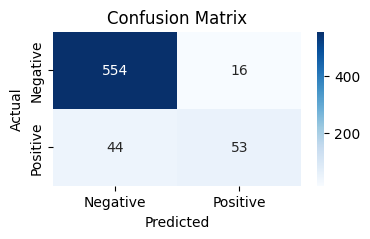


ROC AUC:  0.7591607885693615
Model DT trained.

Training classifier RF:
RandomForestClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                       n_estimators=300)
Time to train and test classifier: 4.63 seconds

Accuracy with validation data: 92.95%

Classification report:

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       570
           1       0.90      0.58      0.70        97

    accuracy                           0.93       667
   macro avg       0.92      0.78      0.83       667
weighted avg       0.93      0.93      0.92       667



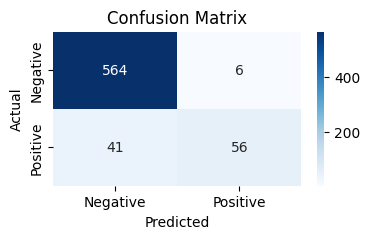


ROC AUC:  0.7833966359196961
Model RF trained.

Training classifier SVM:
SVC(C=9.653177197899158)
Time to train and test classifier: 0.90 seconds

Accuracy with validation data: 91.90%

Classification report:

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       570
           1       0.84      0.55      0.66        97

    accuracy                           0.92       667
   macro avg       0.88      0.76      0.81       667
weighted avg       0.91      0.92      0.91       667



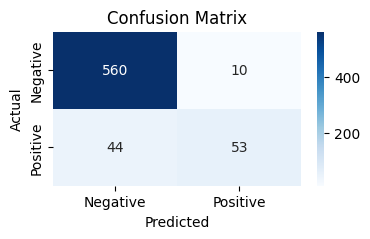


ROC AUC:  0.7644239464640983
Model SVM trained.

Training classifier KNN:
KNeighborsClassifier(n_neighbors=9, p=1, weights='distance')
Time to train and test classifier: 0.11 seconds

Accuracy with validation data: 90.10%

Classification report:

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       570
           1       0.86      0.38      0.53        97

    accuracy                           0.90       667
   macro avg       0.88      0.69      0.74       667
weighted avg       0.90      0.90      0.88       667



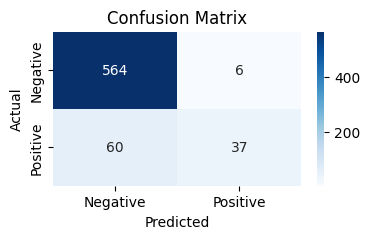


ROC AUC:  0.6854584915897992
Model KNN trained.

Training classifier LGR:
LogisticRegression(C=1200, solver='liblinear', tol=1e-05)
Time to train and test classifier: 0.06 seconds

Accuracy with validation data: 85.31%

Classification report:

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       570
           1       0.48      0.12      0.20        97

    accuracy                           0.85       667
   macro avg       0.67      0.55      0.56       667
weighted avg       0.81      0.85      0.81       667



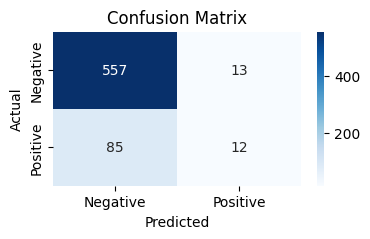


ROC AUC:  0.550452161331163
Model LGR trained.

Training classifier MNB:
MultinomialNB(alpha=0.1)
Time to train and test classifier: 0.02 seconds

Accuracy with validation data: 85.46%

Classification report:

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       570
           1       0.50      0.01      0.02        97

    accuracy                           0.85       667
   macro avg       0.68      0.50      0.47       667
weighted avg       0.80      0.85      0.79       667



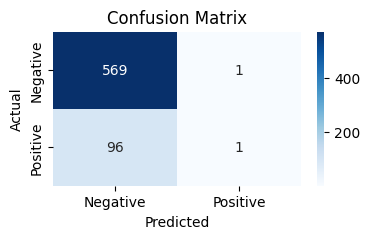


ROC AUC:  0.5042774461928016
Model MNB trained.

Training classifier NN:
MLPClassifier(activation='logistic', alpha=0.001, hidden_layer_sizes=(100, 50))


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Time to train and test classifier: 18.57 seconds

Accuracy with validation data: 86.81%

Classification report:

              precision    recall  f1-score   support

           0       0.88      0.97      0.93       570
           1       0.62      0.25      0.35        97

    accuracy                           0.87       667
   macro avg       0.75      0.61      0.64       667
weighted avg       0.84      0.87      0.84       667



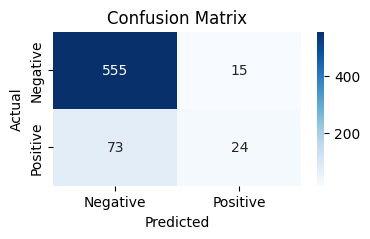


ROC AUC:  0.6105534454693435
Model NN trained.

Training classifier XGB:
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
Time to train and test classifier: 0.12 seconds

Accuracy with validation data: 93.55%

Classification report:

              precision    recall  f1-score   support

        

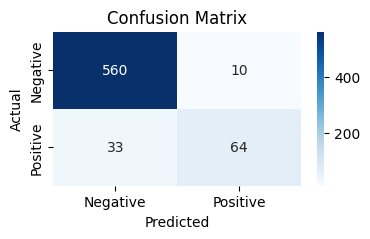


ROC AUC:  0.8211249773919334
Model XGB trained.

Training classifier ADB:
AdaBoostClassifier(algorithm='SAMME', n_estimators=200)
Time to train and test classifier: 0.77 seconds

Accuracy with validation data: 89.66%

Classification report:

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       570
           1       0.80      0.38      0.52        97

    accuracy                           0.90       667
   macro avg       0.85      0.68      0.73       667
weighted avg       0.89      0.90      0.88       667



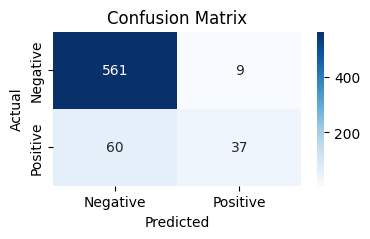


ROC AUC:  0.6828269126424308
Model ADB trained.


In [ ]:
result = []
accuracy1 = []
precision1 = []
recall1 = []
f1score1 = []
auc1 = []
orgNormalised_trained_models = {}
for m in [m for m in models]:
    model = models[m]
    print("\nTraining classifier %s:\n%s" %(m, model))
    st = time.time()
    model.fit(train_x, train_y)
    predicted = model.predict(test_x)
    t = time.time() - st
    print("Time to train and test classifier: %4.2f seconds" %(t))
    acc = evaluateModel(test_y, predicted)
    auc = roc_auc_score(test_y, predicted)
    print("\nROC AUC: ", auc)

    precision = precision_score(test_y, predicted, average='weighted')
    recall = recall_score(test_y, predicted, average='weighted')
    f1 = f1_score(test_y, predicted, average='weighted')
    result.append([m, acc, t])
    accuracy1.append(acc)
    precision1.append(precision)
    recall1.append(recall)
    f1score1.append(f1)
    auc1.append(auc)

    orgNormalised_trained_models[m] = model
    print(f"Model {m} trained.")
    print(60*'=')

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_us_standardized, test_size=0.2, random_state=111, stratify = df_us_standardized.Churn)
x = df_us_standardized.columns[df_us_standardized.columns!="Churn"]
y = "Churn"
train_x = train[x]
train_y = train[y]
test_x = test[x]
test_y = test[y]


Training classifier DT:
DecisionTreeClassifier(max_depth=5, max_features='sqrt', min_samples_leaf=5,
                       min_samples_split=10)
Time to train and test classifier: 0.02 seconds

Accuracy with validation data: 87.37%

Classification report:

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       570
           1       0.91      0.83      0.87       570

    accuracy                           0.87      1140
   macro avg       0.88      0.87      0.87      1140
weighted avg       0.88      0.87      0.87      1140



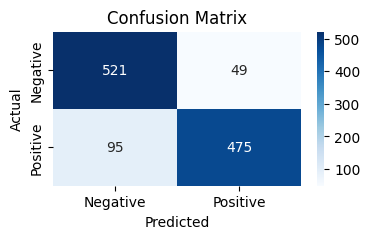


ROC AUC:  0.8736842105263158
Model DT trained.

Training classifier RF:
RandomForestClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                       n_estimators=300)
Time to train and test classifier: 2.11 seconds

Accuracy with validation data: 89.39%

Classification report:

              precision    recall  f1-score   support

           0       0.88      0.91      0.90       570
           1       0.91      0.88      0.89       570

    accuracy                           0.89      1140
   macro avg       0.89      0.89      0.89      1140
weighted avg       0.89      0.89      0.89      1140



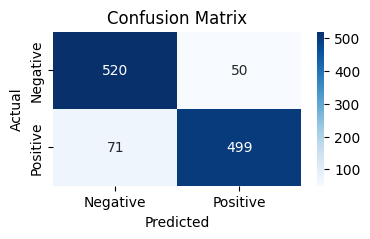


ROC AUC:  0.8938596491228069
Model RF trained.

Training classifier SVM:
SVC(C=9.653177197899158)
Time to train and test classifier: 1.07 seconds

Accuracy with validation data: 89.82%

Classification report:

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       570
           1       0.92      0.87      0.90       570

    accuracy                           0.90      1140
   macro avg       0.90      0.90      0.90      1140
weighted avg       0.90      0.90      0.90      1140



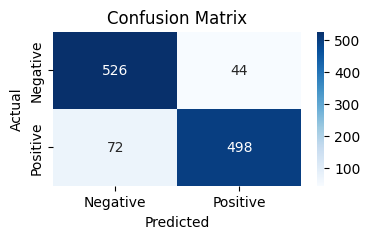


ROC AUC:  0.8982456140350877
Model SVM trained.

Training classifier KNN:
KNeighborsClassifier(n_neighbors=9, p=1, weights='distance')
Time to train and test classifier: 0.17 seconds

Accuracy with validation data: 92.81%

Classification report:

              precision    recall  f1-score   support

           0       0.96      0.89      0.93       570
           1       0.90      0.96      0.93       570

    accuracy                           0.93      1140
   macro avg       0.93      0.93      0.93      1140
weighted avg       0.93      0.93      0.93      1140



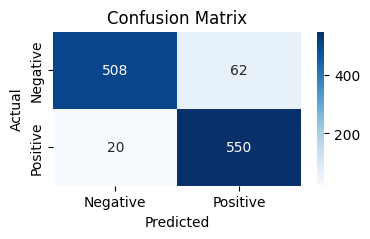


ROC AUC:  0.9280701754385965
Model KNN trained.

Training classifier LGR:
LogisticRegression(C=1200, solver='liblinear', tol=1e-05)
Time to train and test classifier: 0.02 seconds

Accuracy with validation data: 80.18%

Classification report:

              precision    recall  f1-score   support

           0       0.79      0.82      0.80       570
           1       0.81      0.79      0.80       570

    accuracy                           0.80      1140
   macro avg       0.80      0.80      0.80      1140
weighted avg       0.80      0.80      0.80      1140



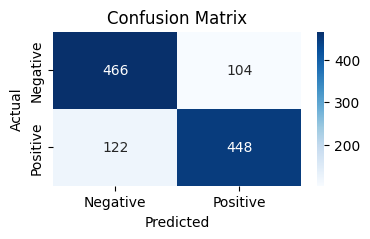


ROC AUC:  0.8017543859649123
Model LGR trained.

Training classifier MNB:
MultinomialNB(alpha=0.1)
Time to train and test classifier: 0.01 seconds

Accuracy with validation data: 65.26%

Classification report:

              precision    recall  f1-score   support

           0       0.75      0.46      0.57       570
           1       0.61      0.84      0.71       570

    accuracy                           0.65      1140
   macro avg       0.68      0.65      0.64      1140
weighted avg       0.68      0.65      0.64      1140



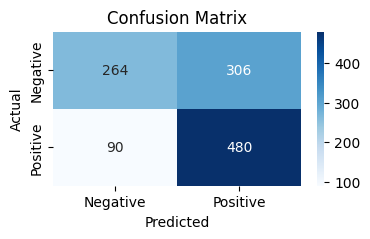


ROC AUC:  0.6526315789473685
Model MNB trained.

Training classifier NN:
MLPClassifier(activation='logistic', alpha=0.001, hidden_layer_sizes=(100, 50))


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Time to train and test classifier: 11.80 seconds

Accuracy with validation data: 86.67%

Classification report:

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       570
           1       0.87      0.86      0.87       570

    accuracy                           0.87      1140
   macro avg       0.87      0.87      0.87      1140
weighted avg       0.87      0.87      0.87      1140



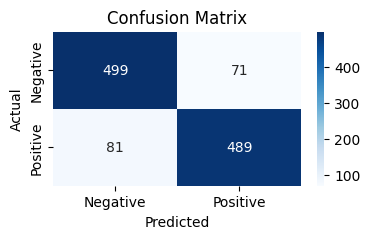


ROC AUC:  0.8666666666666667
Model NN trained.

Training classifier XGB:
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
Time to train and test classifier: 0.28 seconds

Accuracy with validation data: 90.88%

Classification report:

              precision    recall  f1-score   support

        

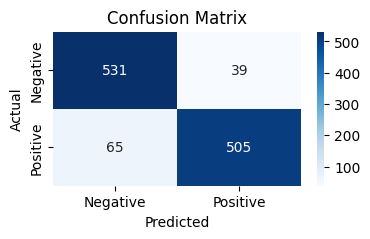


ROC AUC:  0.9087719298245613
Model XGB trained.

Training classifier ADB:
AdaBoostClassifier(algorithm='SAMME', n_estimators=200)
Time to train and test classifier: 1.46 seconds

Accuracy with validation data: 88.51%

Classification report:

              precision    recall  f1-score   support

           0       0.88      0.89      0.89       570
           1       0.89      0.88      0.88       570

    accuracy                           0.89      1140
   macro avg       0.89      0.89      0.89      1140
weighted avg       0.89      0.89      0.89      1140



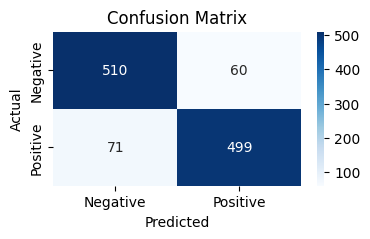


ROC AUC:  0.8850877192982456
Model ADB trained.


In [ ]:
result = []
accuracy2 = []
precision2 = []
recall2 = []
f1score2 = []
auc2 = []
orgStandard_trained_models = {}
for m in [m for m in models]:
    model = models[m]
    print("\nTraining classifier %s:\n%s" %(m, model))
    st = time.time()
    model.fit(train_x, train_y)
    predicted = model.predict(test_x)
    t = time.time() - st
    print("Time to train and test classifier: %4.2f seconds" %(t))
    acc = evaluateModel(test_y, predicted)
    auc = roc_auc_score(test_y, predicted)
    print("\nROC AUC: ", auc)

    precision = precision_score(test_y, predicted, average='weighted')
    recall = recall_score(test_y, predicted, average='weighted')
    f1 = f1_score(test_y, predicted, average='weighted')
    result.append([m, acc, t])
    accuracy2.append(acc)
    precision2.append(precision)
    recall2.append(recall)
    f1score2.append(f1)
    auc2.append(auc)

    orgStandard_trained_models[m] = model
    print(f"Model {m} trained.")
    print(60*'=')

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_ds_standardized, test_size=0.2, random_state=111, stratify = df_ds_standardized.Churn)
x = df_ds_standardized.columns[df_ds_standardized.columns!="Churn"]
y = "Churn"
train_x = train[x]
train_y = train[y]
test_x = test[x]
test_y = test[y]


Training classifier DT:
DecisionTreeClassifier(max_depth=5, max_features='sqrt', min_samples_leaf=5,
                       min_samples_split=10)
Time to train and test classifier: 0.01 seconds

Accuracy with validation data: 82.47%

Classification report:

              precision    recall  f1-score   support

           0       0.79      0.89      0.83        97
           1       0.87      0.76      0.81        97

    accuracy                           0.82       194
   macro avg       0.83      0.82      0.82       194
weighted avg       0.83      0.82      0.82       194



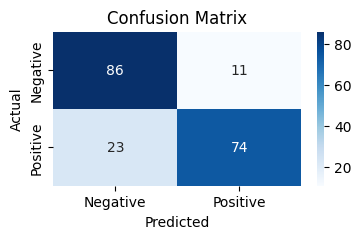


ROC AUC:  0.8247422680412371
Model DT trained.

Training classifier RF:
RandomForestClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                       n_estimators=300)
Time to train and test classifier: 0.68 seconds

Accuracy with validation data: 89.18%

Classification report:

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        97
           1       0.92      0.86      0.89        97

    accuracy                           0.89       194
   macro avg       0.89      0.89      0.89       194
weighted avg       0.89      0.89      0.89       194



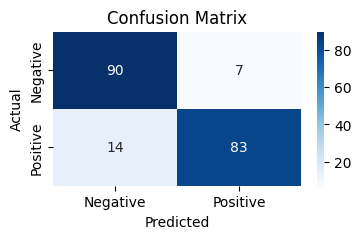


ROC AUC:  0.8917525773195877
Model RF trained.

Training classifier SVM:
SVC(C=9.653177197899158)
Time to train and test classifier: 0.03 seconds

Accuracy with validation data: 84.54%

Classification report:

              precision    recall  f1-score   support

           0       0.83      0.87      0.85        97
           1       0.86      0.82      0.84        97

    accuracy                           0.85       194
   macro avg       0.85      0.85      0.85       194
weighted avg       0.85      0.85      0.85       194



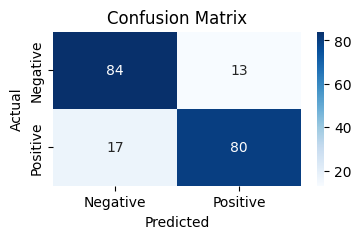


ROC AUC:  0.845360824742268
Model SVM trained.

Training classifier KNN:
KNeighborsClassifier(n_neighbors=9, p=1, weights='distance')
Time to train and test classifier: 0.01 seconds

Accuracy with validation data: 82.99%

Classification report:

              precision    recall  f1-score   support

           0       0.77      0.94      0.85        97
           1       0.92      0.72      0.81        97

    accuracy                           0.83       194
   macro avg       0.85      0.83      0.83       194
weighted avg       0.85      0.83      0.83       194



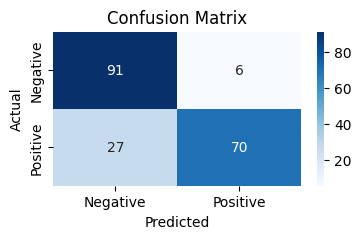


ROC AUC:  0.8298969072164949
Model KNN trained.

Training classifier LGR:
LogisticRegression(C=1200, solver='liblinear', tol=1e-05)
Time to train and test classifier: 0.01 seconds

Accuracy with validation data: 78.35%

Classification report:

              precision    recall  f1-score   support

           0       0.79      0.77      0.78        97
           1       0.78      0.79      0.79        97

    accuracy                           0.78       194
   macro avg       0.78      0.78      0.78       194
weighted avg       0.78      0.78      0.78       194



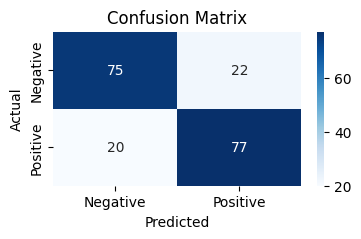


ROC AUC:  0.7835051546391751
Model LGR trained.

Training classifier MNB:
MultinomialNB(alpha=0.1)
Time to train and test classifier: 0.01 seconds

Accuracy with validation data: 63.92%

Classification report:

              precision    recall  f1-score   support

           0       0.70      0.48      0.57        97
           1       0.61      0.79      0.69        97

    accuracy                           0.64       194
   macro avg       0.65      0.64      0.63       194
weighted avg       0.65      0.64      0.63       194



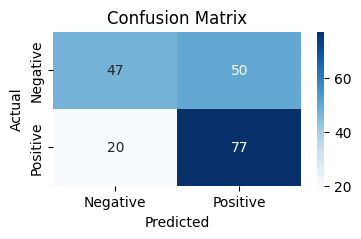


ROC AUC:  0.6391752577319587
Model MNB trained.

Training classifier NN:
MLPClassifier(activation='logistic', alpha=0.001, hidden_layer_sizes=(100, 50))
Time to train and test classifier: 1.36 seconds

Accuracy with validation data: 78.87%

Classification report:

              precision    recall  f1-score   support

           0       0.79      0.78      0.79        97
           1       0.79      0.79      0.79        97

    accuracy                           0.79       194
   macro avg       0.79      0.79      0.79       194
weighted avg       0.79      0.79      0.79       194



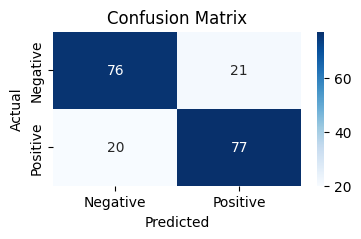


ROC AUC:  0.7886597938144329
Model NN trained.

Training classifier XGB:
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
Time to train and test classifier: 0.06 seconds

Accuracy with validation data: 87.11%

Classification report:

              precision    recall  f1-score   support

        

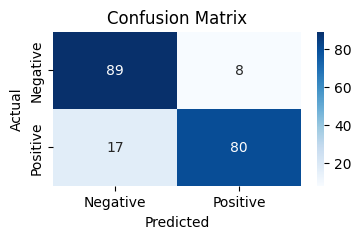


ROC AUC:  0.8711340206185567
Model XGB trained.

Training classifier ADB:
AdaBoostClassifier(algorithm='SAMME', n_estimators=200)
Time to train and test classifier: 0.48 seconds

Accuracy with validation data: 84.02%

Classification report:

              precision    recall  f1-score   support

           0       0.81      0.89      0.85        97
           1       0.88      0.79      0.83        97

    accuracy                           0.84       194
   macro avg       0.84      0.84      0.84       194
weighted avg       0.84      0.84      0.84       194



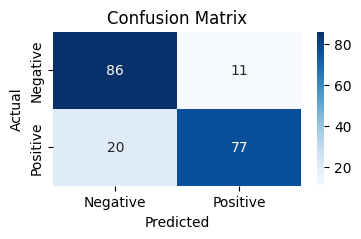


ROC AUC:  0.8402061855670102
Model ADB trained.


In [ ]:
result = []
accuracy3 = []
precision3 = []
recall3 = []
f1score3 = []
auc3 = []
usNormalised_trained_models = {}
for m in [m for m in models]:
    model = models[m]
    print("\nTraining classifier %s:\n%s" %(m, model))
    st = time.time()
    model.fit(train_x, train_y)
    predicted = model.predict(test_x)
    t = time.time() - st
    print("Time to train and test classifier: %4.2f seconds" %(t))
    acc = evaluateModel(test_y, predicted)
    auc = roc_auc_score(test_y, predicted)
    print("\nROC AUC: ", auc)

    precision = precision_score(test_y, predicted, average='weighted')
    recall = recall_score(test_y, predicted, average='weighted')
    f1 = f1_score(test_y, predicted, average='weighted')
    result.append([m, acc, t])
    accuracy3.append(acc)
    precision3.append(precision)
    recall3.append(recall)
    f1score3.append(f1)
    auc3.append(auc)

    usNormalised_trained_models[m] = model
    print(f"Model {m} trained.")
    print(60*'=')

# Evaluation


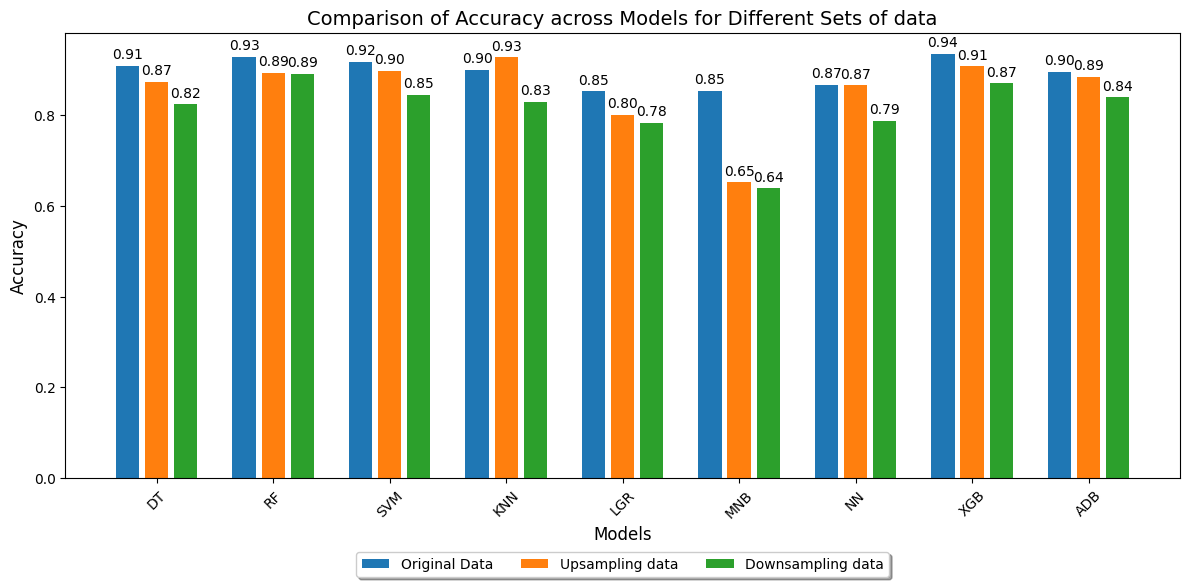

In [ ]:
mm_accuracy = pd.DataFrame({
    'Model': [m for m in models],
    'Set 1': accuracy1,
    'Set 2': accuracy2,
    'Set 3': accuracy3,
})

bar_width = 0.2
padding = 0.05
index = np.arange(len(models))

plt.figure(figsize=(12, 6))
bar1 = plt.bar(index - padding, mm_accuracy['Set 1'], bar_width, label='Original Data')
bar2 = plt.bar(index + bar_width, mm_accuracy['Set 2'], bar_width, label='Upsampling data')
bar3 = plt.bar(index + bar_width*2 + padding, mm_accuracy['Set 3'], bar_width, label='Downsampling data')

plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Comparison of Accuracy across Models for Different Sets of data', fontsize=14)
plt.xticks(index + bar_width , mm_accuracy['Model'], rotation=45)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=3, fontsize='medium')

for bars in [bar1, bar2, bar3]:
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height:.2f}',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),
                     textcoords="offset points",
                     ha='center', va='bottom')

plt.tight_layout()
plt.show()